<a href="https://colab.research.google.com/github/BrillaM/biostat-212b-2024-spring/blob/main/212B_Project_Plan_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Library imports
import numpy as np # for vector / matrix operations
import pandas as pd # for data manipulation
from matplotlib import pyplot # for basic plots
import seaborn as sns # for advanced plots
import xgboost as xgb # for xgboost

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/212Bdataset/Mental_Health_Dataset.csv

/content/drive/MyDrive/212Bdataset/Mental_Health_Dataset.csv


#Load the data from csv file

In [ ]:
root_dir="/content/drive/Mydrive/"
indir = '/content/drive/MyDrive/212Bdataset/'
infile = indir + 'Mental_Health_Dataset.csv'

In [ ]:
data = pd.read_csv(infile)

#*drop* NA values, duplicates and care options

In [ ]:
# Remove NaN values in place in 'data'
data.dropna(inplace=True)

# Drop 'care_options' column and reassign the DataFrame to 'df'
df = data.drop(columns=['care_options'])

#drop duplicates
df=df.drop_duplicates()

# Now when you check the head of 'df', it should not have 'care_options' or 'Timestamp' columns
df.head()



,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


In [ ]:
print(df['Gender'].value_counts())

Gender
Male      232050
Female     50858
Name: count, dtype: int64


In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


In [ ]:
df.dtypes


Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
dtype: object

In [ ]:
print(df['Country'].value_counts())

Country
United States             163919
United Kingdom             50576
Canada                     17529
Australia                   6014
Netherlands                 5891
Ireland                     5542
Germany                     4680
Sweden                      2812
India                       2771
France                      2340
Brazil                      2340
New Zealand                 1991
South Africa                1991
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      821
Poland                       821
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Croatia                      390
Thailand                     390
Nigeria                      390
Bo

#EDA

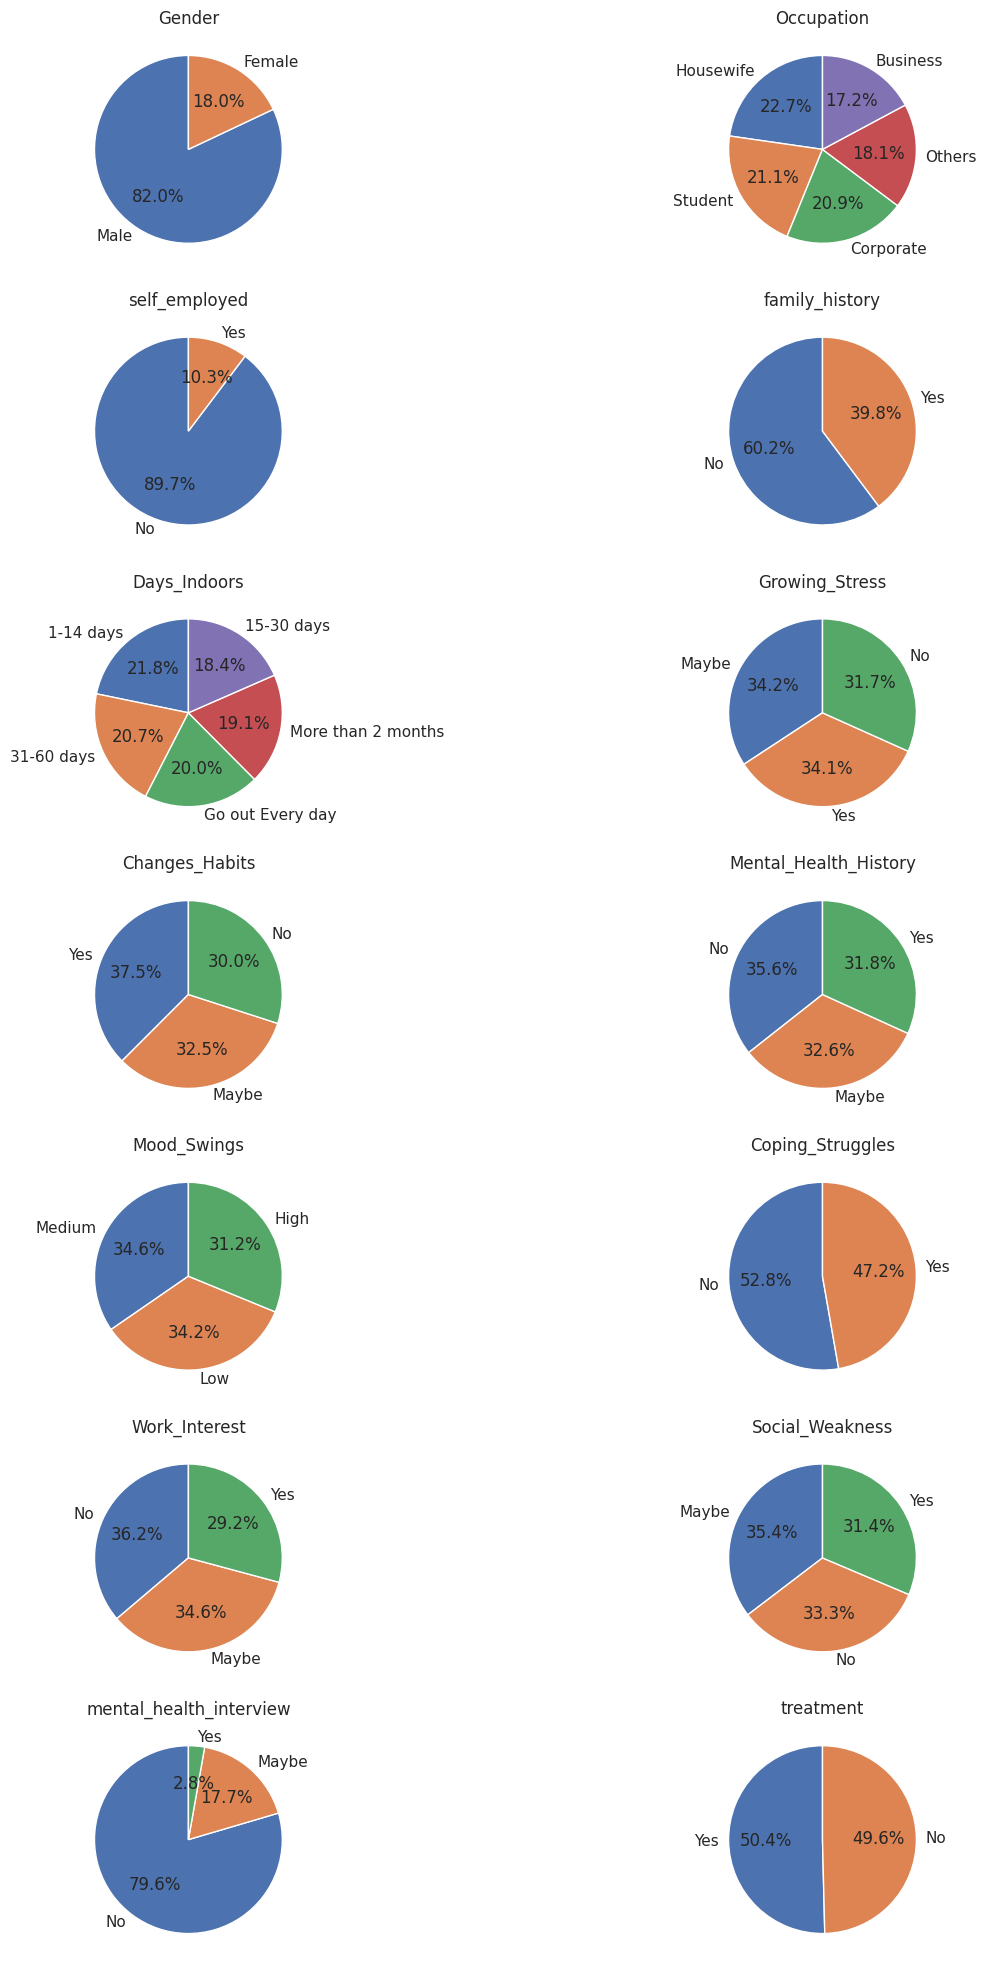

In [ ]:
sns.set_style("whitegrid")

cols_to_visualize = ['Gender',
                     'Occupation',
                     'self_employed',
                     'family_history',
                     'Days_Indoors',
                     'Growing_Stress',
                     'Changes_Habits',
                     'Mental_Health_History',
                     'Mood_Swings',
                     'Coping_Struggles',
                     'Work_Interest',
                     'Social_Weakness',
                     'mental_health_interview',
                     'treatment']
counts = []

for col in cols_to_visualize:
    counts.append(df[col].value_counts())

fig, axs = pyplot.subplots(7, 2, figsize=(15, 25))
axs = axs.flatten()

for i, (col, count) in enumerate(zip(cols_to_visualize, counts)):
    axs[i].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(col)


pyplot.show()

<ipython-input-9-54173b1157a0>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data = df, x="treatment", alpha=.5, palette="muted")


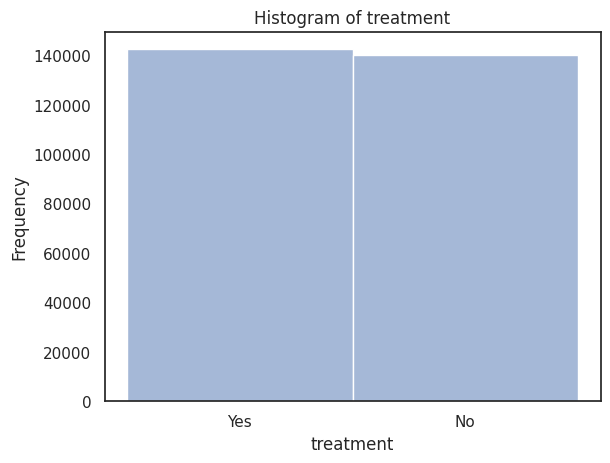

In [ ]:
sns.set_theme(style="white")
# Histogram by groups
histplot = sns.histplot(data = df, x="treatment", alpha=.5, palette="muted")
histplot.set( ylabel='Frequency', xlabel='treatment',
           title= 'Histogram of treatment')
pyplot.show()

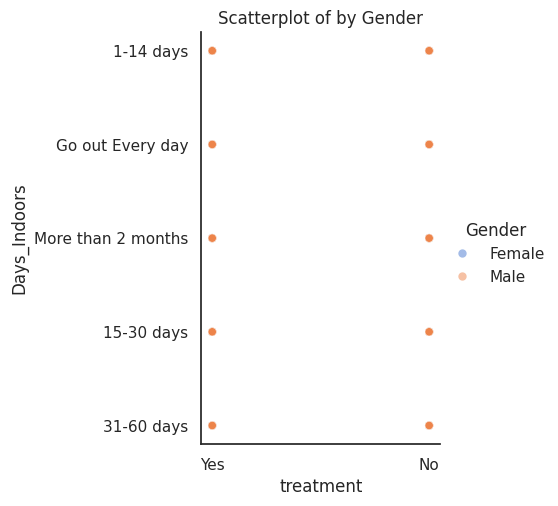

In [ ]:
scplot = sns.relplot(data = df, x="treatment", y="Days_Indoors",
                     hue="Gender",  alpha=.5, palette="muted")
scplot.set( ylabel='Days_Indoors', xlabel='treatment',
           title= 'Scatterplot of by Gender')
pyplot.show()

In [ ]:
mh_df=df.copy(deep=True)
mh_df['Timestamp'] = pd.to_datetime(df['Timestamp'])

mh_df['Date'] = mh_df['Timestamp'].dt.date
mh_df['Time_Of_Day'] = mh_df['Timestamp'].dt.time

#And for month day and year
mh_df['Day'] = mh_df['Timestamp'].dt.day
mh_df['Month'] = mh_df['Timestamp'].dt.month
mh_df['Year'] = mh_df['Timestamp'].dt.year

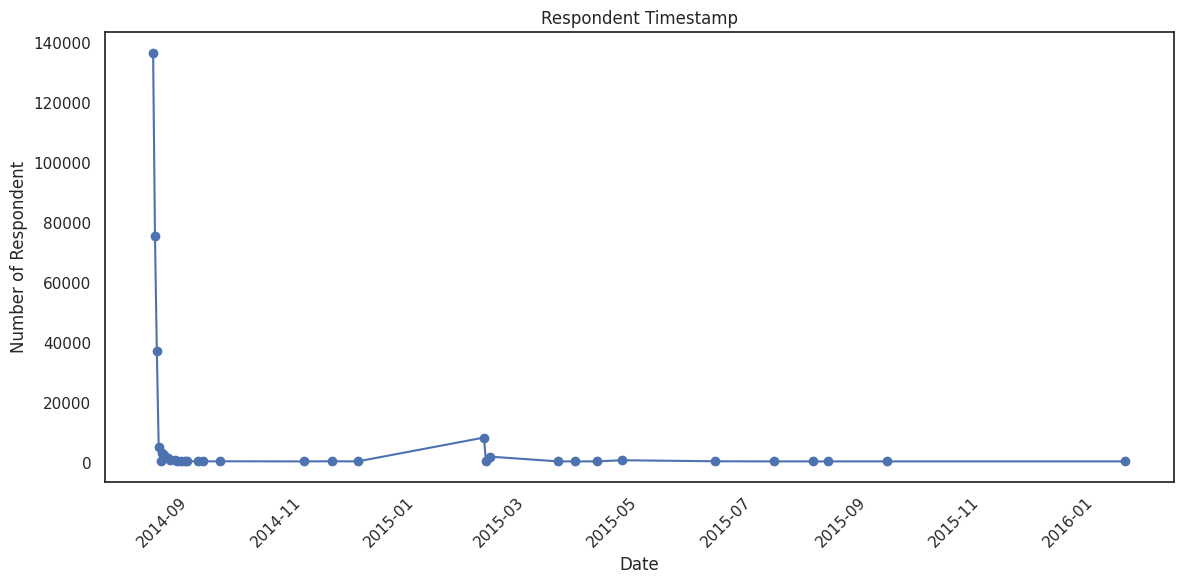

In [ ]:
daily_counts = mh_df.groupby(mh_df['Date']).size()
daily_counts.head()

pyplot.figure(figsize=(12, 6))
pyplot.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
pyplot.title('Respondent Timestamp')
pyplot.xlabel('Date')
pyplot.ylabel('Number of Respondent')
pyplot.xticks(rotation=45)
pyplot.tight_layout()
pyplot.show()

In [ ]:
from matplotlib import pyplot # for basic plots
import seaborn as sns # for advanced plots


In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


Since pairplot need the data to be numberic, so didn't use  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


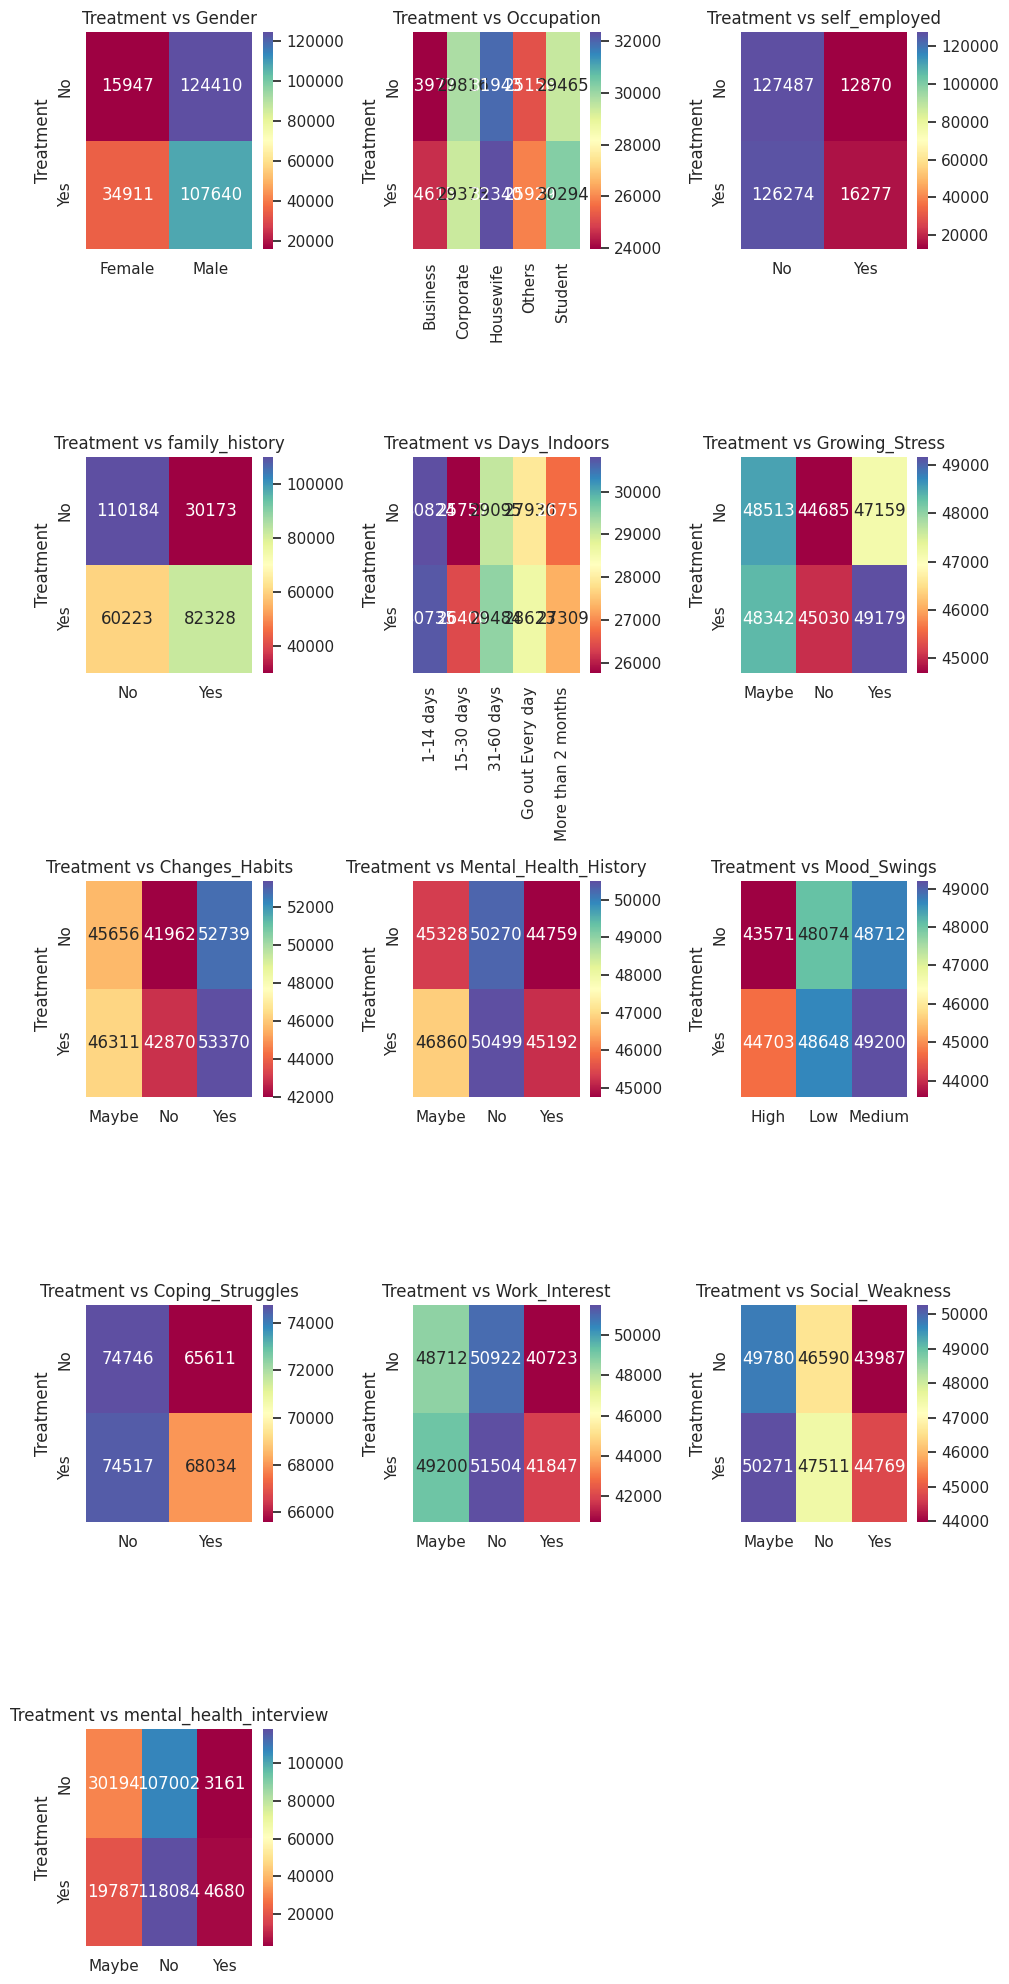

In [145]:
import matplotlib.pyplot as plt  # This line is important to define 'plt'

# Your set style
sns.set_style("whitegrid")

# Define the list of variables you want to compare with 'treatment'
variables = [
    'Gender', 'Occupation', 'self_employed', 'family_history',
    'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
    'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
    'mental_health_interview'
]

# Create a subplot grid: we will have 13 heatmaps, so you can arrange them in a grid that suits your preference
fig, axs = plt.subplots(5, 3, figsize=(10, 20 ))  # Adjust as needed for your number of variables
axs = axs.flatten()  # Flatten the axis array for easy iteration

for i, var in enumerate(variables):
    # Create a crosstab for each variable against 'treatment'
    crosstab = pd.crosstab(df['treatment'], df[var])
    # Plot the heatmap in the ith subplot
    sns.heatmap(crosstab, ax=axs[i], annot=True, fmt="d", cmap="Spectral")
    # Set the title for each heatmap
    axs[i].set_title(f'Treatment vs {var}')
    # Set the labels
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Treatment')

# Turn off any unused subplots
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



#Clean Data


downsampling


In [ ]:
# First, determine the number of occurrences of the minority class (female)
n_min_class = df['Gender'].value_counts().min()

# Separate the dataset into two based on the class
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Randomly sample from the majority class (male) to match the number of the minority class (female)
df_male_downsampled = df_male.sample(n=n_min_class, random_state=42)

# Concatenate the downsampled male dataframe with the female dataframe
df_balanced = pd.concat([df_female, df_male_downsampled])

# Shuffle the resulting dataset so that the samples are randomly ordered
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df = df_balanced

In [ ]:
#drop Timestamp
df.drop(columns=['Date','Time_Of_Day','Day','Month','Year','Timestamp'], inplace=True)

In [ ]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
0,Female,United States,Corporate,No,Yes,No,Go out Every day,Maybe,Yes,Maybe,High,No,Maybe,No,No
1,Male,Germany,Corporate,No,No,No,More than 2 months,Maybe,Yes,No,Low,No,Yes,Maybe,No
2,Male,United Kingdom,Student,No,No,No,1-14 days,Maybe,Yes,Maybe,High,Yes,No,No,No
3,Female,United States,Others,No,No,No,31-60 days,Yes,Yes,No,Medium,No,Yes,Maybe,No
4,Female,United States,Housewife,No,Yes,Yes,1-14 days,No,Maybe,Maybe,High,No,No,No,No


In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Label encode all categorical columns except 'Timestamp'
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
df.head()


,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
0,0,34,1,0,1,0,3,0,2,0,0,0,0,1,1
1,1,13,1,0,0,0,4,0,2,1,1,0,2,0,1
2,1,33,4,0,0,0,0,0,2,0,0,1,1,1,1
3,0,34,3,0,0,0,2,2,2,1,2,0,2,0,1
4,0,34,2,0,1,1,0,1,0,0,0,0,1,1,1


In [ ]:
df.count()

Gender                     101716
Country                    101716
Occupation                 101716
self_employed              101716
family_history             101716
treatment                  101716
Days_Indoors               101716
Growing_Stress             101716
Changes_Habits             101716
Mental_Health_History      101716
Mood_Swings                101716
Coping_Struggles           101716
Work_Interest              101716
Social_Weakness            101716
mental_health_interview    101716
dtype: int64

Dealing Imbalanced Data

In [ ]:
# First, determine the number of occurrences of the minority class (female)
n_min_class = df['Gender'].value_counts().min()

# Separate the dataset into two based on the class
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Randomly sample from the majority class (male) to match the number of the minority class (female)
df_male_downsampled = df_male.sample(n=n_min_class, random_state=42)

# Concatenate the downsampled male dataframe with the female dataframe
df_balanced = pd.concat([df_female, df_male_downsampled])

# Shuffle the resulting dataset so that the samples are randomly ordered
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
df_encoder= pd.DataFrame()
# Initialize a LabelEncoder
le = LabelEncoder()

# Label encode all categorical columns except 'Timestamp'
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and col != 'Timestamp']
for column in categorical_columns:
    df_encoder[column] = le.fit_transform(df[column])


df_encoder.head()



,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,Date,Time_Of_Day
0,0,34,0,0,0,0,2,0,1,2,2,1,1,1,1,0,434
1,1,28,3,0,0,0,2,1,1,0,1,0,0,2,1,0,452
2,1,34,4,0,1,0,2,0,2,0,0,1,2,0,1,2,83
3,0,34,4,0,0,1,4,0,1,1,1,1,2,2,1,2,170
4,0,34,0,0,1,0,2,1,0,0,2,1,1,2,1,2,92


In [ ]:
df_encoder.count()

Gender                     101716
Country                    101716
Occupation                 101716
self_employed              101716
family_history             101716
treatment                  101716
Days_Indoors               101716
Growing_Stress             101716
Changes_Habits             101716
Mental_Health_History      101716
Mood_Swings                101716
Coping_Struggles           101716
Work_Interest              101716
Social_Weakness            101716
mental_health_interview    101716
Date                       101716
Time_Of_Day                101716
dtype: int64

In [ ]:
df_encoder.dtypes

Gender                     int64
Country                    int64
Occupation                 int64
self_employed              int64
family_history             int64
treatment                  int64
Days_Indoors               int64
Growing_Stress             int64
Changes_Habits             int64
Mental_Health_History      int64
Mood_Swings                int64
Coping_Struggles           int64
Work_Interest              int64
Social_Weakness            int64
mental_health_interview    int64
Date                       int64
Time_Of_Day                int64
dtype: object

# Build Logistic regression model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

df=df_encoder
df_train, df_test = train_test_split(df, test_size=0.33, random_state = 42)

In [ ]:
print (f"Size of training set : {df_train.shape[0]} rows , {df_train.shape[1]} columns")
print (f"Size of test set : {df_test.shape[0]} rows , {df_test.shape[1]} columns")

Size of training set : 68149 rows , 17 columns
Size of test set : 33567 rows , 17 columns


In [ ]:
x_train = df_train.loc[:, df_train.columns != 'treatment']
y_train = df_train.treatment
x_test = df_test.loc[:, df_test.columns != 'treatment']
y_test = df_test.treatment

In [ ]:
y_train.head(3)

77087    1
44367    1
65622    0
Name: treatment, dtype: int64

In [ ]:
# Initialize the logistic regression model object
LRmodel = LogisticRegression(solver='liblinear')
# Train it with training data
LRmodel.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Predict Y values of trauining data
y_train_pred = LRmodel.predict(x_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
target_names = ['without treatment', 'with treatment']
print(classification_report(y_train, y_train_pred, target_names=target_names))

                   precision    recall  f1-score   support

without treatment       0.65      0.60      0.62     29232
   with treatment       0.72      0.76      0.74     39392

         accuracy                           0.69     68624
        macro avg       0.69      0.68      0.68     68624
     weighted avg       0.69      0.69      0.69     68624



In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']
cnf_matrix

,predicted_no_treatment,predicted_treatment
true_no_treatment,17481,11751
true_treatment,9288,30104


In [ ]:
# Predict Y values of trauining data
y_test_pred = LRmodel.predict(x_test)
target_names = ['without treatment', 'with treatment']
print('\n------------\n'+
      'Classification report on test data' +
      '\n------------\n')
print(classification_report(y_test, y_test_pred, target_names=target_names))

#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']

print('\n------------\n'+
      'Confusion matrix on test data' +
      '\n------------\n')

print(cnf_matrix)


------------
Classification report on test data
------------

                   precision    recall  f1-score   support

without treatment       0.65      0.60      0.63     14391
   with treatment       0.72      0.76      0.74     19409

         accuracy                           0.69     33800
        macro avg       0.69      0.68      0.68     33800
     weighted avg       0.69      0.69      0.69     33800


------------
Confusion matrix on test data
------------

                   predicted_no_treatment  predicted_treatment
true_no_treatment                    8644                 5747
true_treatment                       4578                14831


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:

# predict probabilities
y_train_prob = LRmodel.predict_proba(x_train)
y_train_prob = y_train_prob[:,1]

# calculate false positive and true positive rates
# these numbers are used to plot roc curve
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
# calculate roc auc
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, y_train_prob)

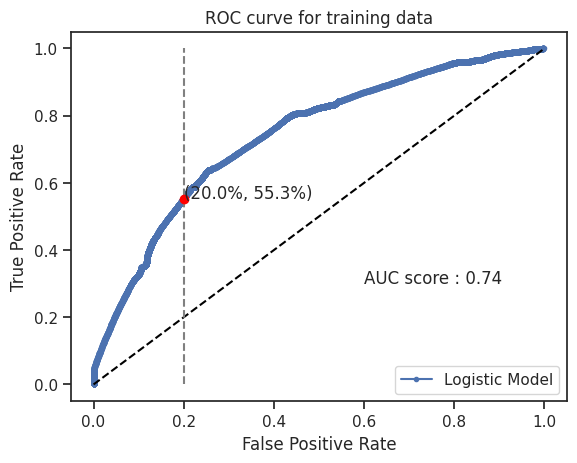

In [ ]:
from matplotlib import pyplot

# plot model roc curve on test data
pyplot.plot(fpr, tpr, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [0,1], linestyle='--', color='black' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_bench = 0.2
pyplot.plot([fpr_bench,fpr_bench], [0,1], linestyle='--', color='grey' )
# find highest TPR for 20% FPR
max_tpr = max(tpr[fpr<=0.2])
pyplot.plot([fpr_bench], [max_tpr], marker = 'o',color='red' )
anno_str = "(" + str(np.round(fpr_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_tpr*100 ,1)) + \
          "%)"
pyplot.text(fpr_bench, max_tpr, anno_str)

# Report AUC score
auc_str = "AUC score : " + str(np.round(roc_auc_train, 2))
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

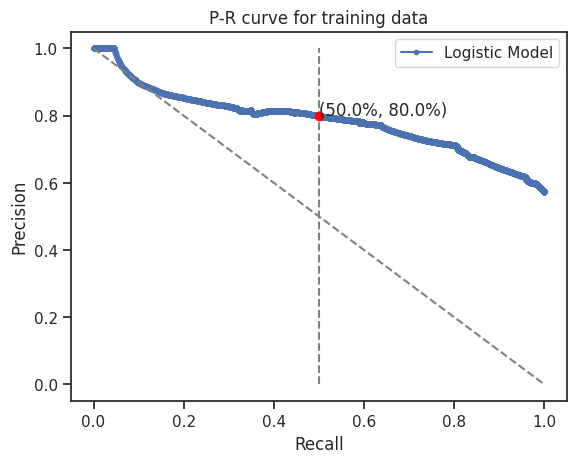

In [ ]:
# plot precision-recall curve on test data
pyplot.plot(recall, precision, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision we can get if we want recall to be 50% of higher
recall_bench = 0.5
pyplot.plot([recall_bench, recall_bench], [0,1], linestyle='--', color='grey' )

# find highest TPR for 20% FPR
max_prec = max(precision[recall>=recall_bench])
pyplot.plot([recall_bench], [max_prec], marker = 'o',color='red' )
anno_str = "(" + str(np.round(recall_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_prec*100 ,1)) + \
          "%)"
pyplot.text(recall_bench, max_prec, anno_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('P-R curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
dict_eval = {}
for dset in ['train', 'test']:
  # predict probabilities
  if (dset=='train'):
      x,y = x_train, y_train
  else:
      x,y = x_test, y_test

  y_prob = LRmodel.predict_proba(x)
  y_prob = y_prob[:, 1]

  # calculate false positive and true positive rates
  # these numbers are used to plot roc curve
  fpr, tpr, _ = roc_curve(y, y_prob)
  # calculate roc auc
  roc_auc = roc_auc_score(y, y_prob)

  # calculate precision-recall curve
  precision, recall, _ = precision_recall_curve(y, y_prob)
  pr_auc = average_precision_score(y, y_prob)

  dict_eval[dset] = {'fpr':fpr, 'tpr':tpr, 'roc_auc':roc_auc,
                     'prec':precision, 'recall':recall, 'pr_auc':pr_auc
                     }

Text(0.5, 1.0, 'ROC curve for training and test data')

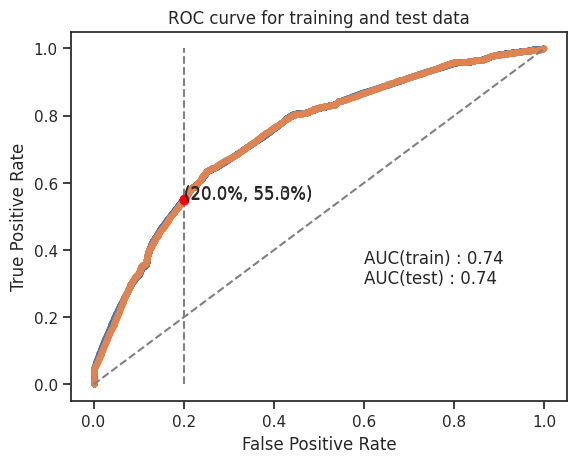

In [ ]:
# plot model roc curve on test data
pyplot.plot(dict_eval['train']['fpr'], dict_eval['train']['tpr'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['fpr'], dict_eval['test']['tpr'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [0,1], linestyle='--', color='grey' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_thresh = 0.2
pyplot.plot([fpr_thresh,fpr_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_tpr = max(dict_eval[dset]['tpr'][dict_eval[dset]['fpr'] <= fpr_thresh])
  pyplot.plot([fpr_thresh], [max_tpr], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(fpr_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_tpr*100 ,1)) + \
            "%)"
  pyplot.text(fpr_thresh, max_tpr, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['roc_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training and test data')

Text(0.5, 1.0, 'PR curve for training and test data')

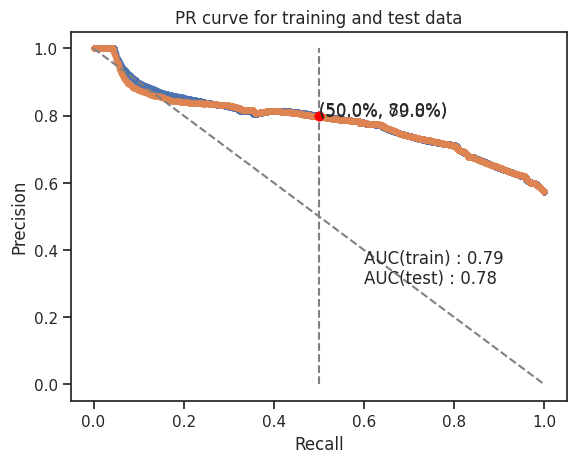

In [ ]:
# compare PR curve on train vs test data
pyplot.plot(dict_eval['train']['recall'], dict_eval['train']['prec'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['recall'], dict_eval['test']['prec'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision for recall >= 50%
recall_thresh = 0.5
pyplot.plot([recall_thresh,recall_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_prec = max(dict_eval[dset]['prec'][dict_eval[dset]['recall'] >= recall_thresh])
  pyplot.plot([recall_thresh], [max_prec], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(recall_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_prec*100 ,1)) + \
            "%)"
  pyplot.text(recall_thresh, max_prec, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['pr_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('PR curve for training and test data')

# Decision tree model


In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state = 42)

In [ ]:
print (f"Size of training set : {df_train.shape[0]} rows , {df_train.shape[1]} columns")
print (f"Size of training set : {df_test.shape[0]} rows , {df_test.shape[1]} columns")

Size of training set : 68624 rows , 15 columns
Size of training set : 33800 rows , 15 columns


In [ ]:
x_train = df_train.loc[:, df_train.columns != 'treatment']
y_train = df_train.treatment
x_test = df_test.loc[:, df_test.columns != 'treatment']
y_test = df_test.treatment

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [ ]:

# Initialize the logistic regression model object
clf_tree = dtree(criterion='gini', max_depth=4, random_state=1)

# Train it with training data
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
y_train_pred = clf_tree.predict(x_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
target_names = ['without treatment', 'with treatment']
print(classification_report(y_train, y_train_pred, target_names=target_names))

                   precision    recall  f1-score   support

without treatment       0.67      0.58      0.62     29232
   with treatment       0.72      0.79      0.75     39392

         accuracy                           0.70     68624
        macro avg       0.69      0.68      0.69     68624
     weighted avg       0.70      0.70      0.70     68624



In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']
cnf_matrix

,predicted_no_treatment,predicted_treatment
true_no_treatment,16891,12341
true_treatment,8236,31156


view the fitted tree model



In [ ]:
from sklearn import tree
from matplotlib import pyplot
from sklearn.tree import export_text

In [ ]:
#not working
feature_names = x_train.columns
class_names = ['no treatment', 'treatment']
text_tree = tree.export_text(clf_tree,
                             feature_names = feature_names,
                             class_names = class_names)
print(text_tree)

TypeError: export_text() got an unexpected keyword argument 'class_names'

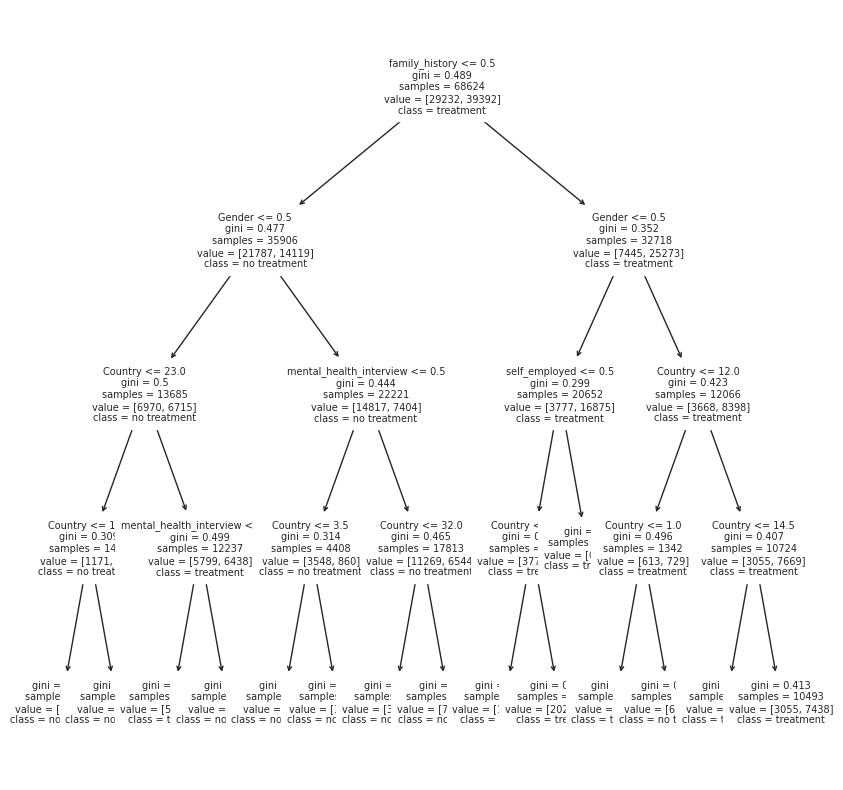

In [ ]:
feature_names = x_train.columns
class_names = ['no treatment', 'treatment']

# View thw tree model (this does not mention variable names)
fig, ax = pyplot.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, feature_names = feature_names, class_names=class_names,
               fontsize=7)
pyplot.show()

Model performance on test data


In [ ]:
# Predict Y values of trauining data
y_test_pred = clf_tree.predict(x_test)
target_names = ['without diabetes', 'with diabetes']
print('\n------------\n'+
      'Classification report on test data' +
      '\n------------\n')
print(classification_report(y_test, y_test_pred, target_names=target_names))

#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_diabetes', 'predicted_diabetes']
cnf_matrix.index = ['true_no_diabetes', 'true_diabetes']

print('\n------------\n'+
      'Confusion matrix on test data' +
      '\n------------\n')

print(cnf_matrix)


------------
Classification report on test data
------------

                  precision    recall  f1-score   support

without diabetes       0.67      0.58      0.62     14391
   with diabetes       0.72      0.79      0.75     19409

        accuracy                           0.70     33800
       macro avg       0.69      0.68      0.68     33800
    weighted avg       0.70      0.70      0.69     33800


------------
Confusion matrix on test data
------------

                  predicted_no_diabetes  predicted_diabetes
true_no_diabetes                   8302                6089
true_diabetes                      4104               15305


ROC, AUC

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
# predict probabilities
y_train_prob = clf_tree.predict_proba(x_train)
y_train_prob = y_train_prob[:,1]

# calculate false positive and true positive rates
# these numbers are used to plot roc curve
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
# calculate roc auc
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, y_train_prob)

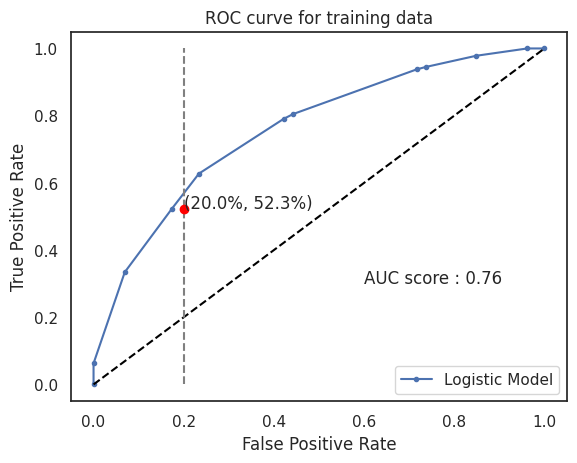

In [ ]:
from matplotlib import pyplot

# plot model roc curve on test data
pyplot.plot(fpr, tpr, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [0,1], linestyle='--', color='black' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_bench = 0.2
pyplot.plot([fpr_bench,fpr_bench], [0,1], linestyle='--', color='grey' )
# find highest TPR for 20% FPR
max_tpr = max(tpr[fpr<=0.2])
pyplot.plot([fpr_bench], [max_tpr], marker = 'o',color='red' )
anno_str = "(" + str(np.round(fpr_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_tpr*100 ,1)) + \
          "%)"
pyplot.text(fpr_bench, max_tpr, anno_str)

# Report AUC score
auc_str = "AUC score : " + str(np.round(roc_auc_train, 2))
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

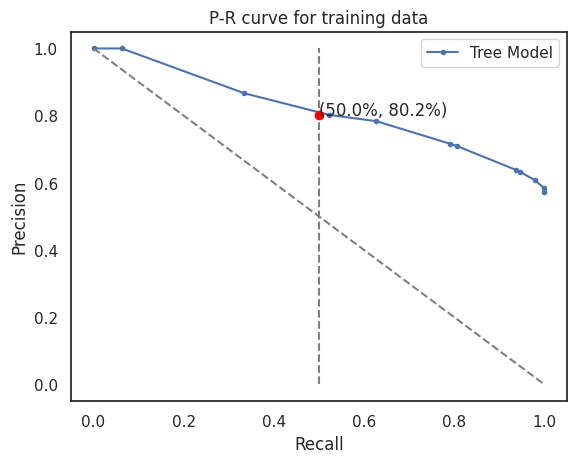

In [ ]:
# plot precision-recall curve on test data
pyplot.plot(recall, precision, marker='.', label='Tree Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision we can get if we want recall to be 50% of higher
recall_bench = 0.5
pyplot.plot([recall_bench, recall_bench], [0,1], linestyle='--', color='grey' )

# find highest TPR for 20% FPR
max_prec = max(precision[recall>=recall_bench])
pyplot.plot([recall_bench], [max_prec], marker = 'o',color='red' )
anno_str = "(" + str(np.round(recall_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_prec*100 ,1)) + \
          "%)"
pyplot.text(recall_bench, max_prec, anno_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('P-R curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Comparing the performance on test vs training data


In [ ]:
dict_eval = {}
for dset in ['train', 'test']:
  # predict probabilities
  if (dset=='train'):
      x,y = x_train, y_train
  else:
      x,y = x_test, y_test

  y_prob = clf_tree.predict_proba(x)
  y_prob = y_prob[:, 1]

  # calculate false positive and true positive rates
  # these numbers are used to plot roc curve
  fpr, tpr, _ = roc_curve(y, y_prob)
  # calculate roc auc
  roc_auc = roc_auc_score(y, y_prob)

  # calculate precision-recall curve
  precision, recall, _ = precision_recall_curve(y, y_prob)
  pr_auc = average_precision_score(y, y_prob)

  dict_eval[dset] = {'fpr':fpr, 'tpr':tpr, 'roc_auc':roc_auc,
                     'prec':precision, 'recall':recall, 'pr_auc':pr_auc
                     }


# XGBoost


In [ ]:
import xgboost

In [ ]:
from xgboost import XGBClassifier as xgbclass
# Initialize the XGboost model object
xgb_model = xgbclass()
# Train it with training data
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict Y values of trauining data
y_train_pred = xgb_model.predict(x_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
target_names = ['without treatment', 'with treatment']
print(classification_report(y_train, y_train_pred, target_names=target_names))

                   precision    recall  f1-score   support

without treatment       0.71      0.69      0.70     29232
   with treatment       0.77      0.79      0.78     39392

         accuracy                           0.75     68624
        macro avg       0.74      0.74      0.74     68624
     weighted avg       0.75      0.75      0.75     68624



In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']
cnf_matrix

,predicted_no_treatment,predicted_treatment
true_no_treatment,20081,9151
true_treatment,8085,31307


In [ ]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
feature_names = x_train.columns
# Compute the variable importance
importances = xgb_model.feature_importances_
dict_importance = {k:np.round(v,3) for (k,v) in zip(feature_names, importances)}
# Print the variable importance
print(dict_importance)

{'Gender': 0.095, 'Country': 0.088, 'Occupation': 0.006, 'self_employed': 0.081, 'family_history': 0.594, 'Days_Indoors': 0.006, 'Growing_Stress': 0.006, 'Changes_Habits': 0.006, 'Mental_Health_History': 0.007, 'Mood_Swings': 0.006, 'Coping_Struggles': 0.007, 'Work_Interest': 0.006, 'Social_Weakness': 0.007, 'mental_health_interview': 0.084}


Text(0.5, 1.0, 'Feature Importance - Built-in Method')

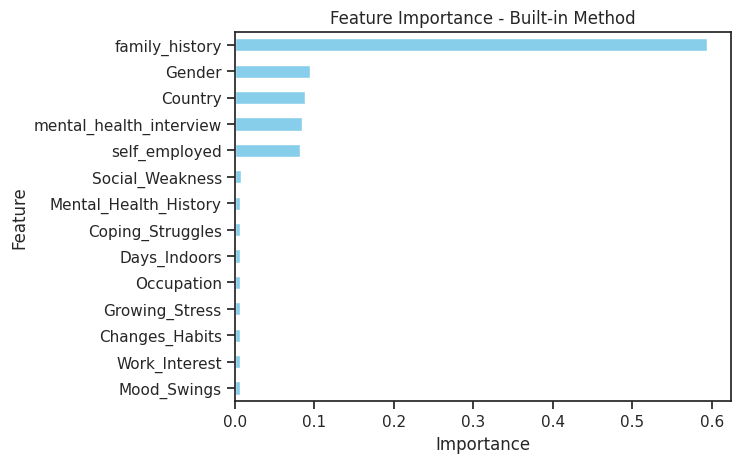

In [ ]:
from matplotlib import pyplot

# Simple plot of feature importance
feature_imp = pd.Series(xgb_model.feature_importances_, index=x_train.columns)
feature_imp.sort_values(ascending=True, inplace=True)
feature_imp.plot.barh(color='skyblue')
pyplot.xlabel("Importance")
pyplot.ylabel("Feature")
pyplot.title("Feature Importance - Built-in Method")

In [ ]:
# Predict Y values of trauining data
y_test_pred = xgb_model.predict(x_test)
target_names = ['without diabetes', 'with diabetes']
print('\n------------\n'+
      'Classification report on test data' +
      '\n------------\n')
print(classification_report(y_test, y_test_pred, target_names=target_names))

#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_diabetes', 'predicted_diabetes']
cnf_matrix.index = ['true_no_diabetes', 'true_diabetes']

print('\n------------\n'+
      'Confusion matrix on test data' +
      '\n------------\n')

print(cnf_matrix)


------------
Classification report on test data
------------

                  precision    recall  f1-score   support

without diabetes       0.67      0.65      0.66     14391
   with diabetes       0.75      0.76      0.75     19409

        accuracy                           0.71     33800
       macro avg       0.71      0.71      0.71     33800
    weighted avg       0.71      0.71      0.71     33800


------------
Confusion matrix on test data
------------

                  predicted_no_diabetes  predicted_diabetes
true_no_diabetes                   9366                5025
true_diabetes                      4626               14783


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
# predict probabilities
y_train_prob = xgb_model.predict_proba(x_train)
y_train_prob = y_train_prob[:,1]

# calculate false positive and true positive rates
# these numbers are used to plot roc curve
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
# calculate roc auc
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, y_train_prob)

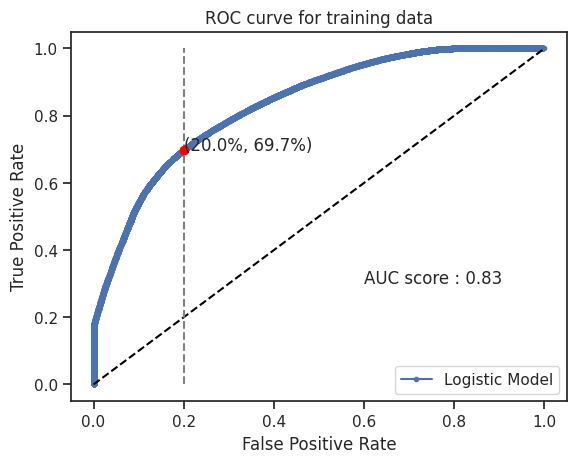

In [ ]:
from matplotlib import pyplot

# plot model roc curve on test data
pyplot.plot(fpr, tpr, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [0,1], linestyle='--', color='black' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_bench = 0.2
pyplot.plot([fpr_bench,fpr_bench], [0,1], linestyle='--', color='grey' )
# find highest TPR for 20% FPR
max_tpr = max(tpr[fpr<=0.2])
pyplot.plot([fpr_bench], [max_tpr], marker = 'o',color='red' )
anno_str = "(" + str(np.round(fpr_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_tpr*100 ,1)) + \
          "%)"
pyplot.text(fpr_bench, max_tpr, anno_str)

# Report AUC score
auc_str = "AUC score : " + str(np.round(roc_auc_train, 2))
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

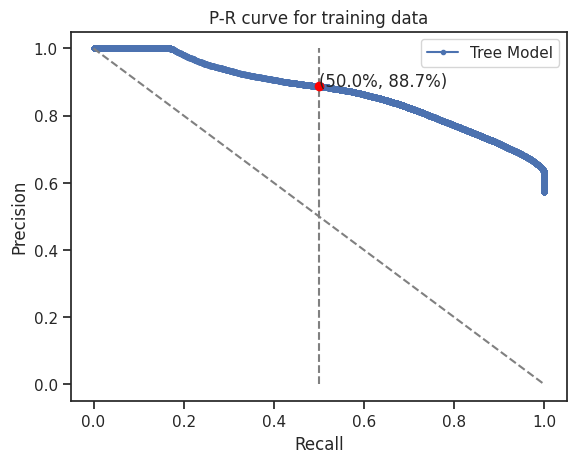

In [ ]:
# plot precision-recall curve on test data
pyplot.plot(recall, precision, marker='.', label='Tree Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision we can get if we want recall to be 50% of higher
recall_bench = 0.5
pyplot.plot([recall_bench, recall_bench], [0,1], linestyle='--', color='grey' )

# find highest TPR for 20% FPR
max_prec = max(precision[recall>=recall_bench])
pyplot.plot([recall_bench], [max_prec], marker = 'o',color='red' )
anno_str = "(" + str(np.round(recall_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_prec*100 ,1)) + \
          "%)"
pyplot.text(recall_bench, max_prec, anno_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('P-R curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
dict_eval = {}
for dset in ['train', 'test']:
  # predict probabilities
  if (dset=='train'):
      x,y = x_train, y_train
  else:
      x,y = x_test, y_test

  y_prob = xgb_model.predict_proba(x)
  y_prob = y_prob[:, 1]

  # calculate false positive and true positive rates
  # these numbers are used to plot roc curve
  fpr, tpr, _ = roc_curve(y, y_prob)
  # calculate roc auc
  roc_auc = roc_auc_score(y, y_prob)

  # calculate precision-recall curve
  precision, recall, _ = precision_recall_curve(y, y_prob)
  pr_auc = average_precision_score(y, y_prob)

  dict_eval[dset] = {'fpr':fpr, 'tpr':tpr, 'roc_auc':roc_auc,
                     'prec':precision, 'recall':recall, 'pr_auc':pr_auc
                     }

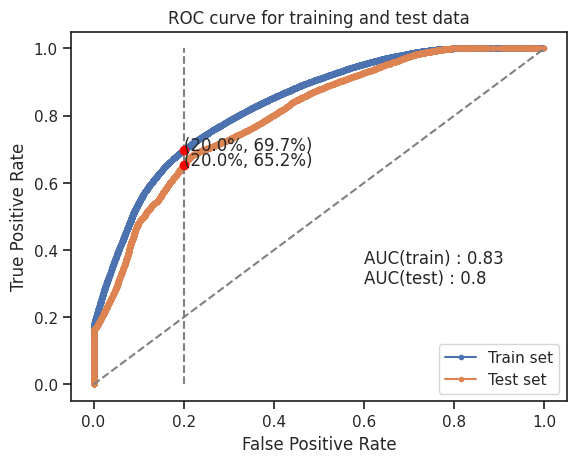

In [ ]:
# plot model roc curve on test data
pyplot.plot(dict_eval['train']['fpr'], dict_eval['train']['tpr'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['fpr'], dict_eval['test']['tpr'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [0,1], linestyle='--', color='grey' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_thresh = 0.2
pyplot.plot([fpr_thresh,fpr_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_tpr = max(dict_eval[dset]['tpr'][dict_eval[dset]['fpr'] <= fpr_thresh])
  pyplot.plot([fpr_thresh], [max_tpr], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(fpr_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_tpr*100 ,1)) + \
            "%)"
  pyplot.text(fpr_thresh, max_tpr, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['roc_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training and test data')
# show the legend
pyplot.legend()

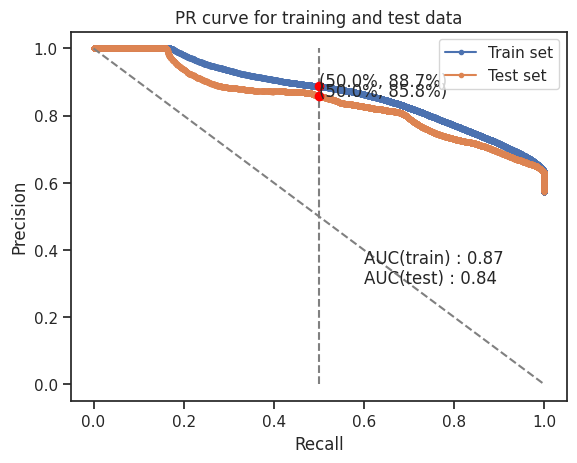

In [ ]:
# compare PR curve on train vs test data
pyplot.plot(dict_eval['train']['recall'], dict_eval['train']['prec'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['recall'], dict_eval['test']['prec'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision for recall >= 50%
recall_thresh = 0.5
pyplot.plot([recall_thresh,recall_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_prec = max(dict_eval[dset]['prec'][dict_eval[dset]['recall'] >= recall_thresh])
  pyplot.plot([recall_thresh], [max_prec], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(recall_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_prec*100 ,1)) + \
            "%)"
  pyplot.text(recall_thresh, max_prec, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['pr_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('PR curve for training and test data')
# show the legend
pyplot.legend()

In [ ]:
# Hyper parameter tuning
# Split trainng data furtehr into train and validation set
# fit model on traiing set and evaluate model on validation set

df_train01, df_valid = train_test_split(df_train, test_size=0.2, random_state = 42)

x_train01 = df_train01.loc[:, df_train01.columns != 'treatment']
y_train01 = df_train01.treatment
x_valid = df_valid.loc[:, df_valid.columns != 'treatment']
y_valid = df_valid.treatment

print(f'Training set size : {df_train.shape}, \nValidation set size : {df_valid.shape}')

Training set size : (68624, 15), 
Validation set size : (13725, 15)


In [ ]:
from sklearn.metrics import accuracy_score

# we will vary subsample, % of training observations to be sampled in each iteration  (default=1)
# we will vary reg_lambda, L2 regularization parameter (default=1)
# we will vary reg_alpha, L1 regularization parameter (default=0)

#param_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_values = [0, 1, 5, 10, 11, 12, 13,14, 15, 20]

validation_acc = []
for param_value in param_values:
  #Initialize model
  #xgb_model01 = xgbclass(subsample = param_value)
  xgb_model01 = xgbclass(reg_lambda = param_value)
  # Fit model
  xgb_model01.fit(x_train01, y_train01)
  # Predict on validation set
  y_pred01 = xgb_model01.predict(x_valid)
  predictions = [round(value) for value in y_pred01]
  accuracy = accuracy_score(y_valid, predictions) * 100.0
  accuracy = accuracy.round(2)
  print(f"Parameter: {param_value} , validation set accuracy: {accuracy}%")
  validation_acc.append(accuracy)

k = np.argmax(validation_acc)
best_param_val = param_values[k]
print(f'\nBest validation accuracy of {validation_acc[k]}% obtained for parameter value {best_param_val}')


Parameter: 0 , validation set accuracy: 71.51%
Parameter: 1 , validation set accuracy: 71.64%
Parameter: 5 , validation set accuracy: 72.15%
Parameter: 10 , validation set accuracy: 72.16%
Parameter: 11 , validation set accuracy: 72.19%
Parameter: 12 , validation set accuracy: 72.39%
Parameter: 13 , validation set accuracy: 72.22%
Parameter: 14 , validation set accuracy: 72.12%
Parameter: 15 , validation set accuracy: 72.42%
Parameter: 20 , validation set accuracy: 72.43%

Best validation accuracy of 72.43% obtained for parameter value 20


In [ ]:
# Fit the tuned model
xgb_model_tuned = xgbclass(reg_alpha = best_param_val)
# Train it with training data
xgb_model_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
dict_eval = {}
for dset in ['train', 'test']:
  # predict probabilities
  if (dset=='train'):
      x,y = x_train, y_train
  else:
      x,y = x_test, y_test

  y_prob = xgb_model_tuned.predict_proba(x)
  y_prob = y_prob[:, 1]

  # calculate false positive and true positive rates
  # these numbers are used to plot roc curve
  fpr, tpr, _ = roc_curve(y, y_prob)
  # calculate roc auc
  roc_auc = roc_auc_score(y, y_prob)

  # calculate precision-recall curve
  precision, recall, _ = precision_recall_curve(y, y_prob)
  pr_auc = average_precision_score(y, y_prob)

  dict_eval[dset] = {'fpr':fpr, 'tpr':tpr, 'roc_auc':roc_auc,
                     'prec':precision, 'recall':recall, 'pr_auc':pr_auc
                     }

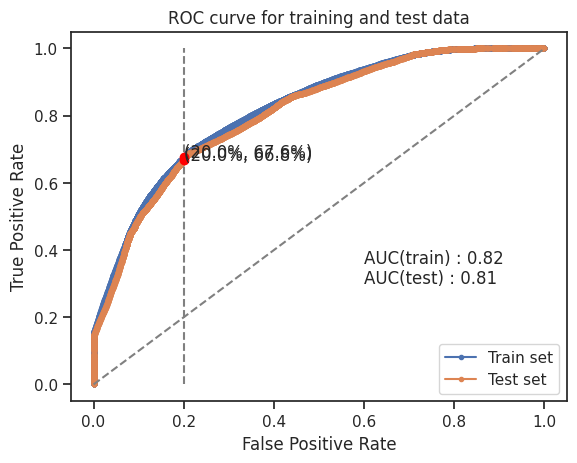

In [ ]:
# plot model roc curve on test data
pyplot.plot(dict_eval['train']['fpr'], dict_eval['train']['tpr'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['fpr'], dict_eval['test']['tpr'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [0,1], linestyle='--', color='grey' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_thresh = 0.2
pyplot.plot([fpr_thresh,fpr_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_tpr = max(dict_eval[dset]['tpr'][dict_eval[dset]['fpr'] <= fpr_thresh])
  pyplot.plot([fpr_thresh], [max_tpr], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(fpr_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_tpr*100 ,1)) + \
            "%)"
  pyplot.text(fpr_thresh, max_tpr, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['roc_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training and test data')
# show the legend
pyplot.legend()
